In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
!ls ../data

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv


In [10]:
aisles = pd.read_csv('../data/aisles.csv')
departments = pd.read_csv('../data/departments.csv')
order_products_prior = pd.read_csv('../data/order_products__prior.csv')
order_products_train = pd.read_csv('../data/order_products__train.csv')
orders = pd.read_csv('../data/orders.csv')
products = pd.read_csv('../data/products.csv')

In [11]:
print len(aisles), len(departments), len(order_products_prior), len(order_products_train), len(orders), len(products)

134 21 32434489 1384617 3421083 49688


In [50]:
departments.head(1)

,department_id,department
0,1,frozen


In [49]:
aisles.head(1)

,aisle_id,aisle
0,1,prepared soups salads


In [48]:
orders.head(1)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN


In [47]:
products.head(1)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19


In [28]:
print len(orders[orders.eval_set == 'prior'].user_id.unique())

206209


In [45]:
users_summary = (orders[orders.eval_set == 'prior']
 .groupby('user_id', as_index=False)
 .agg({'order_id': len,
       'days_since_prior_order': [np.mean, np.median, max, min],
      }))

new_columns = ['user_id', 'number_of_orders', 'avg_days_between_orders',
               'median_days_between_orders', 'max_days_between_orders',
               'min_days_between_orders']

users_summary.columns = new_columns

In [46]:
users_summary.head()

,user_id,number_of_orders,avg_days_between_orders,median_days_between_orders,max_days_between_orders,min_days_between_orders
0,1,10,19.555556,20.0,30.0,0.0
1,2,14,15.230769,13.0,30.0,3.0
2,3,12,12.090909,11.0,21.0,7.0
3,4,5,13.750000,17.0,21.0,0.0
4,5,4,13.333333,11.0,19.0,10.0


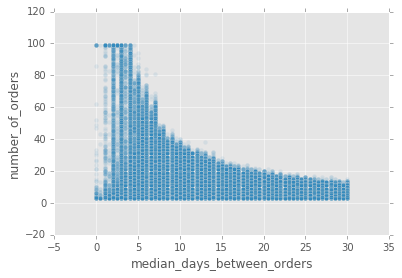

In [67]:
users_summary.plot.scatter('median_days_between_orders', 'number_of_orders', alpha=0.1)

In [95]:
order_products_prior.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [97]:
len(order_products_prior)

32434489

In [119]:
user_orders = pd.merge(order_products_prior, 
                       orders[['order_id', 'user_id', 
                               'days_since_prior_order',
                               'order_dow', 'order_hour_of_day',
                               'order_number']],
                       on='order_id', how='left')

In [120]:
user_orders = pd.merge(user_orders, products, on='product_id', how='left')

In [123]:
user_orders[user_orders.user_id == 202279]

,order_id,product_id,add_to_cart_order,reordered,user_id,days_since_prior_order,order_dow,order_hour_of_day,order_number,product_name,aisle_id,department_id
0,2,33120,1,1,202279,8.0,5,9,3,Organic Egg Whites,86,16
1,2,28985,2,1,202279,8.0,5,9,3,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,8.0,5,9,3,Garlic Powder,104,13
3,2,45918,4,1,202279,8.0,5,9,3,Coconut Butter,19,13
4,2,30035,5,0,202279,8.0,5,9,3,Natural Sweetener,17,13
5,2,17794,6,1,202279,8.0,5,9,3,Carrots,83,4
6,2,40141,7,1,202279,8.0,5,9,3,Original Unflavored Gelatine Mix,105,13
7,2,1819,8,1,202279,8.0,5,9,3,All Natural No Stir Creamy Almond Butter,88,13
8,2,43668,9,0,202279,8.0,5,9,3,Classic Blend Cole Slaw,123,4
990780,104690,1003,1,1,202279,30.0,6,10,8,Organic Turkey Bone Broth,5,13


In [118]:
user_orders.user_id.unique()

array([202279, 205970, 178520, ..., 106586, 181902, 179441], dtype=int64)

In [114]:
orders.tail(14)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421069,3154581,206209,prior,1,3,11,NaN
3421070,1889163,206209,prior,2,3,17,7.0
3421071,1542354,206209,prior,3,5,11,30.0
3421072,688306,206209,prior,4,1,10,30.0
3421073,2307371,206209,prior,5,4,15,3.0
3421074,3186442,206209,prior,6,0,16,3.0
3421075,550836,206209,prior,7,2,13,9.0
3421076,2129269,206209,prior,8,3,17,22.0
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
